# Solutions for Homework 4 - SciPy and plotting
**Due: Oct 26** 

***Total Points: 100***

For full points, your code
- must run without errors
- must by *pythonic*
- must be easily understandable, and well documented (either through inline comments or markdown).
- All plots must have clearly and meaningfully labeled axes, unless you are simply plotting arbitrary numbers. Add legends where needed.
- **Use separate markdown cells for any text answers.**
- **Show your work, i.e, print all relevant output.** Remember that having a variable in the last line of a jupyter cell block automatically prints it's value. You can use multiple code blocks for a single question.
- ***Please see the solutions (and related notes) for the previous HWs, as well as the comments on your submissions, before submitting this assignment. We will be less lenient for repeated mistakes.***
- ***Do not manipulate arrays with loops. In fact, do not use loops anywhere, except for plots and prints.***

Remember to export your Jupyter notebook as a PDF file and upload both to Canvas.
```
File > Save and Export Notebook As... > PDF
```

Run every code block (and make sure the answer if fully visible) before submitting your notebook/PDF.

## Question 0

Import `numpy` and `matplotlib` here. You can import the required `scipy` modules when you need them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1
*20 points*

### Question 1.1
*10 points*

**Numerically** integrate the following (use `scipy.integrate.dblquad`).

**Requirements:**
- Only print $z = ...$, up to 4 decimals. Do not print any other variable.
- Do not use any type of `round()`.

$$z = \int_{0}^{\pi} \int_{0}^{sin(x)} \left( \frac{x^2}{16} - \frac{y^2}{9} - 1 \right) dy dx$$

In [2]:
from scipy.integrate import dblquad

# Define function - pay attention to the order of the arguments (y, x)
func = lambda y, x: (x**2/16) - (y**2/9) - 1

# Intergrate
res, err = dblquad(func, 0, np.pi, 0, np.sin)

In [3]:
# Print if error is small enough
if err < 1e-10:
    print(f"z = {res:.4f}")
else:
    print("Integral could not be evaluated to the required accuracy.")

z = -1.6825


### Question 1.2
*5 points*

Use `sympy` to check your answer.

In [4]:
import sympy as sym

# Define symbols and function
x, y = sym.symbols("x y")
func = (x**2/16) - (y**2/9) - 1

# Integrate wrt y
int_1 = sym.integrate(func, (y, 0, sym.sin(x)))
# Integrate wrt x
int_2 = sym.integrate(int_1, (x, 0, sym.pi))

In [5]:
# Print the float value of the expression
print(f"z = {float(int_2):.4f}")

z = -1.6825


### Question 1.3
*5 points*

- Between `sympy` and `scipy`, which is the better option to obtain the numerical value of $z$? Provide a quantitative justification.
- When would the other package be a better option?

In [6]:
%%timeit

# Define function - pay attention to the order of the arguments (y, x)
func = lambda y, x: (x**2/16) - (y**2/9) - 1

# Intergrate
res, err = dblquad(func, 0, np.pi, 0, np.sin)

479 µs ± 69.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
%%timeit

# Define symbols and function
x, y = sym.symbols("x y")
func = (x**2/16) - (y**2/9) - 1

# Integrate wrt y
int_1 = sym.integrate(func, (y, 0, sym.sin(x)))
# Integrate wrt x
int_2 = sym.integrate(int_1, (x, 0, sym.pi))

75.5 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Answer:**
- Numerical calculations are always faster than symbolic calculations. From the `%%timeit` runs above, `scipy` was >150 times faster than `sympy` in solving this problem.
- `sympy` should be used when a symbolic value/expression is needed.

## Question 2
*20 points*

A simple gravity pendulum ($l = 5 \text{ m}$.) has the following acceleration function, **numerically** obtain and plot its velocity ($\omega$) and displacement ($\theta$) from $t=0$ to $t=5 \text{ s}$.

$$ \ddot\theta + \frac{g}{l} \text{sin} \theta = 0$$

The pendulum starts at rest, at a position of $\theta = 60 ^\circ$.

**Requirements:**
- Use the `scipy.constants` submodule for the value of $g$.
- Plot both variables ($\theta$, $\omega$) with units in terms of degrees, not radians.
- Plot both variables ($\theta$, $\omega$) on the same plot. Use two y axes, one for each variable. Set the color of each y axis label to be the same as the color of the respective curve, so you don't need to have a legend.

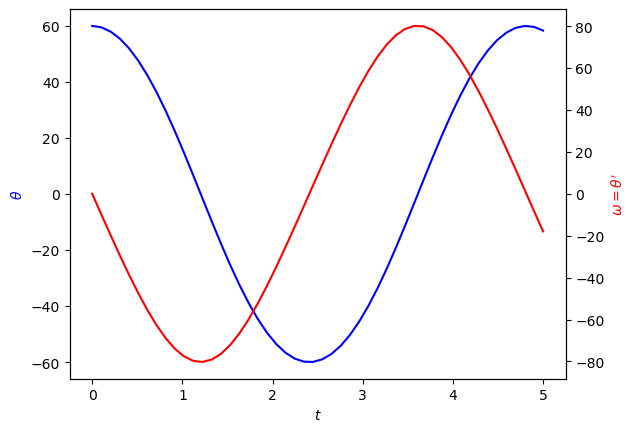

In [8]:
from scipy.integrate import odeint
from scipy.constants import g

# Set up parameters
y0 = 0
yf = 5
t_array = np.linspace(y0, yf)
theta_0 = 60.  # Initial angle
omega_0 = 0.  # Initial velocity
l = 5.  # length

# define 2nd order ODE into a system of two linear 1st order equations 
def pendulum_func(theta, t, g, l):
    return theta[1], -g * np.sin(theta[0]) / l

# Use odeint to obtain theta and omega
theta_array = odeint(pendulum_func, y0=(np.radians(theta_0), omega_0), t=t_array, args=(g, l))

# Convert to degress
theta_deg = np.degrees(theta_array[:, 0])
omega_deg = np.degrees(theta_array[:, 1])

# Create fig and ax objects
fig, ax_theta = plt.subplots()

# Plot theta
ax_theta.plot(t_array, theta_deg, "b")
ax_theta.set_xlabel(r"$t$")
ax_theta.set_ylabel(r"$\theta$", color="b")

# Create second y axis by twinning the x axis
ax_omega = ax_theta.twinx()

# Plot omega
ax_omega.plot(t_array, omega_deg, "r")
ax_omega.set_ylabel(r"$\omega = \theta'$", color="r");

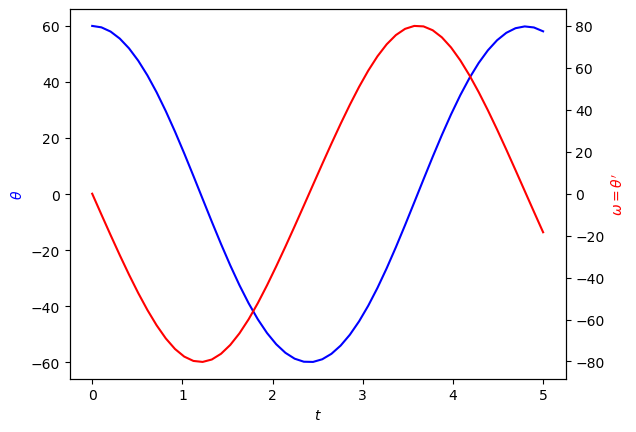

In [9]:
# Alternatively, using a newer scipy function
from scipy.integrate import solve_ivp

# Set up parameters
y0 = 0
yf = 5
theta_0 = 60.  # Initial angle
omega_0 = 0.  # Initial velocity
l = 5.  # length

# define 2nd order ODE into a system of two linear 1st order equations
# Order of t and theta is different than odeint (more intuitive here)
def pendulum_func(t, theta, g, l):
    return theta[1], -g * np.sin(theta[0]) / l

# Use solve_ivp to obtain theta and omega
# t_span is required, t_eval (similar to t_array) is optional
# returns a solution object
sol = solve_ivp(pendulum_func, t_span=(y0, yf), y0=(np.radians(theta_0), omega_0), t_eval=np.linspace(y0, yf), args=(g, l))

# Use object attributes to get t and theta
t_array, theta_array = sol.t, sol.y  # t_array will be the same as t_eval

# Convert to degress
theta_deg = np.degrees(theta_array[0])
omega_deg = np.degrees(theta_array[1])

# Create fig and ax objects
fig, ax_theta = plt.subplots()

# Plot theta
ax_theta.plot(t_array, theta_deg, "b")
ax_theta.set_xlabel(r"$t$")
ax_theta.set_ylabel(r"$\theta$", color="b")

# Create second y axis by twinning the x axis
ax_omega = ax_theta.twinx()

# Plot omega
ax_omega.plot(t_array, omega_deg, "r")
ax_omega.set_ylabel(r"$\omega = \theta'$", color="r");

## Question 3
*20 points*

### Question 3.1
*5 points*

Run the code block below to obtain a very sparse `x` and `y` grid, and plot the following function.

$$z(x,y) = \text{sin} \left( \frac{1}{x^2} + \frac{1}{y} \right) + \text{cos} \left( \frac{1}{x} + \frac{1}{y^2} \right)$$

In [10]:
# Run this code block without changes
x = np.arange(-1.01, 1.01, 0.1)
y = np.arange(-1.01, 1.01, 0.1)

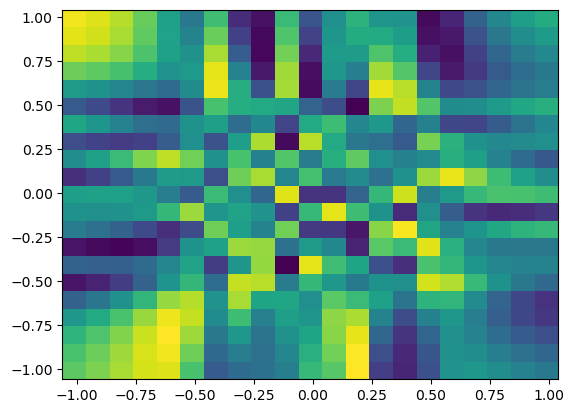

In [11]:
# Create meshed grid
X, Y = np.meshgrid(x, y)
Z = np.sin(1/X**2 + 1/Y) + np.cos(1/X + 1/Y**2)

# Plot
plt.pcolormesh(X, Y, Z);

### Question 3.2
*10 points*

Perform at least 3 kinds of 2D interpolatation to get a more meaningful plots.

In [12]:
from scipy.interpolate import interp2d

# Create finer grid
x_int = np.arange(-1.01, 1.01, 0.01)
y_int = np.arange(-1.01, 1.01, 0.01)
X_int, Y_int = np.meshgrid(x_int, y_int)

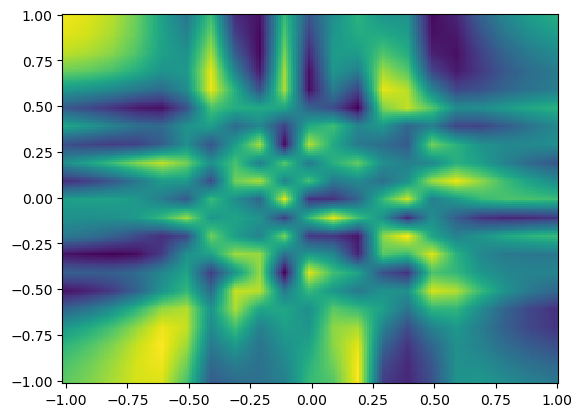

In [13]:
# Linear interpolation
linear_int = interp2d(x, y, Z)
Z_linear_int = linear_int(x_int, y_int)

# Plot
plt.pcolormesh(X_int, Y_int, Z_linear_int);

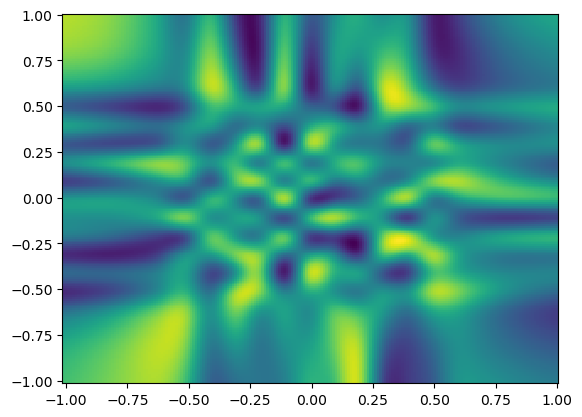

In [14]:
# Cubic interpolation
linear_int = interp2d(x, y, Z, kind="cubic")
Z_cubic_int = linear_int(x_int, y_int)

# Plot
plt.pcolormesh(X_int, Y_int, Z_cubic_int);

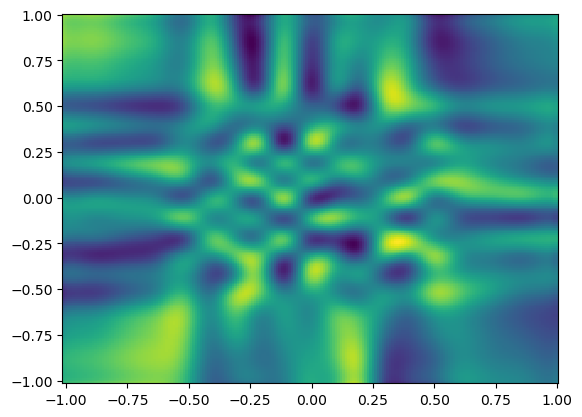

In [15]:
# Quintic interpolation
linear_int = interp2d(x, y, Z, kind="quintic")
Z_quintic_int = linear_int(x_int, y_int)

# Plot
plt.pcolormesh(X_int, Y_int, Z_quintic_int);

### Question 3.3
*5 points*

- Comment on the results above.
- Why do you think there are less options for the `kind` of 2D interpolation, as compared to 1D interpolation?

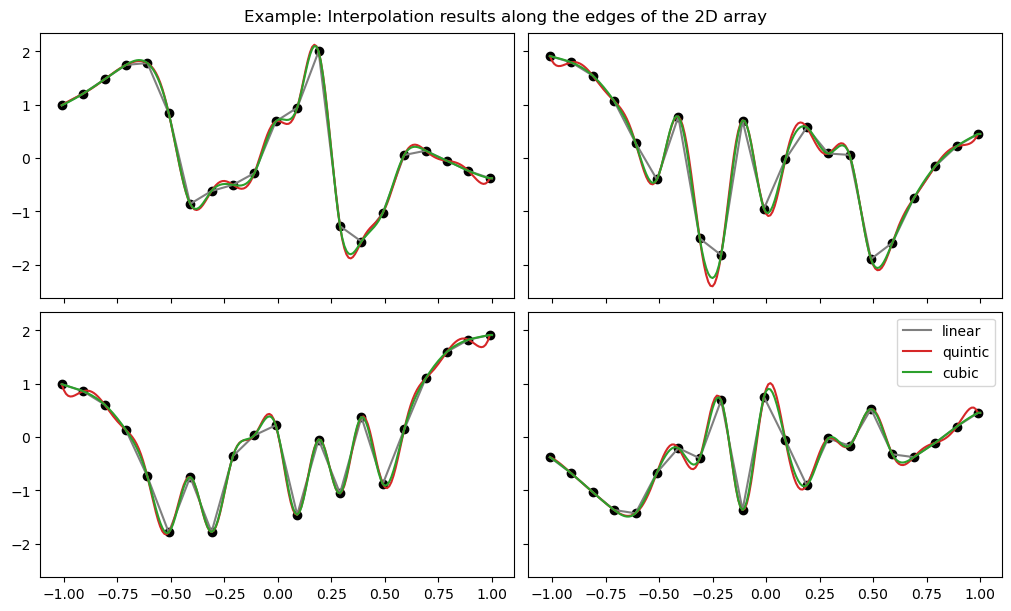

In [16]:
# Plotting along the edges using slices
fig, axs = plt.subplots(2, 2, figsize=(10,6), layout="constrained", sharex=True, sharey=True)

# slice() can be used to create a slice object that can be passed to the loop.
# array[slice(start, stop)] is equivalent to array[start:stop]
# array[slice(None)] is equivalent to array[:]
slices = [(slice(0,1), slice(None)), (slice(-1,-2,-1), slice(None)), (slice(None), slice(0,1)), (slice(None), slice(-1,-2,-1))]

for ax, slice_ax in zip(axs.ravel(), slices):
    ax.plot(x, Z[slice_ax].flatten(), "ko")
    ax.plot(x_int, Z_linear_int[slice_ax].flatten(), color="tab:gray", label="linear")
    ax.plot(x_int, Z_quintic_int[slice_ax].flatten(), color="tab:red", label="quintic")
    ax.plot(x_int, Z_cubic_int[slice_ax].flatten(), color="tab:green", label="cubic")

ax.legend()
fig.suptitle("Example: Interpolation results along the edges of the 2D array");

**Answer:**
- The 2D `cubic` interpolation provides a smoother curve than the 2D `linear` interpolation, due to the continuity of the first derivative (slope) at the interpolation points. The `quintic` interpolation doesn't add much improvement for the higher computational cost, and also adds some undesireable kinks in the data.
- 1D interpolation also has the `quadratic` interpolation option, which has a continuous slope at the interpolation points, leading to a smooth curve. Biquadratic (2D `quadratric`) interpolation doesn't have a smooth slope, and hence offers no benefit over bilinear (1d `linear`) interpolation for the additional computational cost. For a smooth slope, bicubic (2D `cubic`) interpolation is required. In addition, the `nearest`, `nearest-up`, `previous` and `next` kinds of interpolation do not have meaning in 2D. 

**Note:** The plot was not expected in your answer. It's just some extra information for you.

## Question 4
*40 points*

### Question 4.1
*5 points*

Raman spectroscopy is performed on a highly oriented pyrolytic graphite (HOPG) specimen.

Import the data from the `HOPG_raman.txt` file and plot the data (Intensity vs Wave_number).

**Requirements:**
- Do not modify the text file in any way.
- Do not use `skiprows`, `skip_header`, or any similar argument.

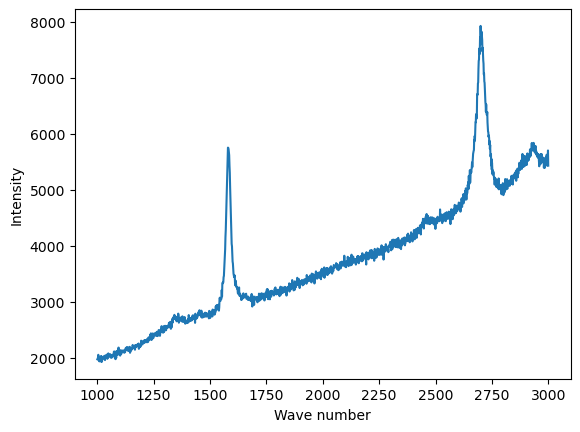

In [17]:
# Load data
raman_data = np.genfromtxt("HOPG_raman.txt")
wave_number, intensity = raman_data.T  # separate into 1D arrays

# Plot
plt.plot(wave_number, intensity)
plt.xlabel("Wave number")
plt.ylabel("Intensity");

### Question 4.2
*5 points*

Detrend the data and plot the result.

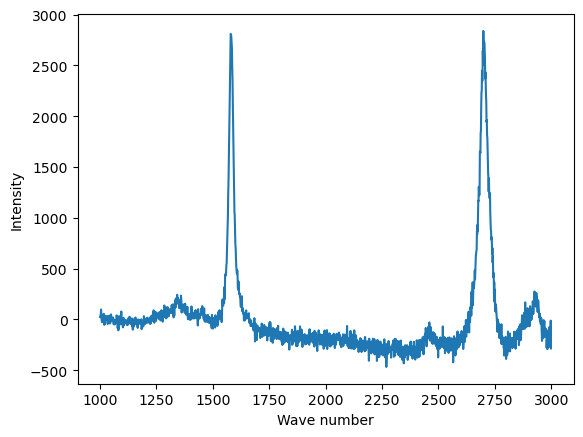

In [18]:
from scipy import signal

intensity_detrended = signal.detrend(intensity)

# Plot
plt.plot(wave_number, intensity_detrended)
plt.xlabel("Wave number")
plt.ylabel("Intensity");

### Question 4.3
*10 points*

As you can see, the data is quite noisy. Smooth the data using a Savitzky-Golay filter. Experiment with various parameters for the filter.

Plot the detrended and smoothed data on the same plot, to make sure that you're not changing the data by over-smoothing.

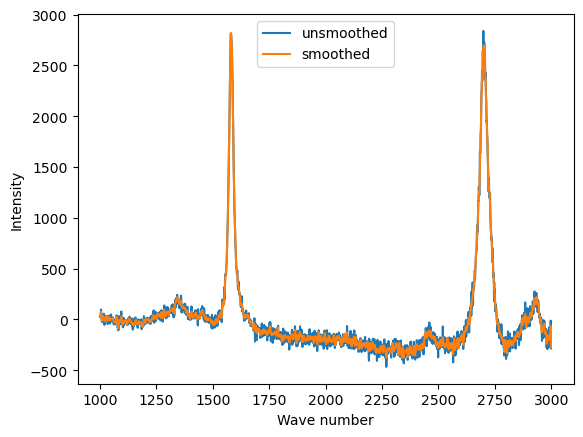

In [19]:
# Savitzky-Golay filter
intensity_smooth = signal.savgol_filter(intensity_detrended, 15, 7)

# Plot
plt.plot(wave_number, intensity_detrended, label="unsmoothed")
plt.plot(wave_number, intensity_smooth, label="smoothed")
plt.xlabel("Wave number")
plt.ylabel("Intensity")
plt.legend(loc="upper center");

### Question 4.4
*5 points*

- How do the `window_length` and `polyorder` parameters affect/change the smoothed data?
- Ideally, for each parameter, should the value be low or high to avoid changing the data?

**Answer:**
- The Savitzky-Golay filter fits a polynomial of order `polyorder` to successive "windows" of adjacent data points. The number of data points in each window is set by the `window_length` parameter. For a constant `polyorder`, increasing the `window_length` increases the smoothness of the data. For a constant `window_length`, increasing the `polyorder` reduces the smoothness of the data.
- Hence, like in any regression, we want a large ratio of the number of points, i.e., `window_length` to the `poly_order`. However, simply maximizing the `window_length` and minimizing the `poly_order` is not ideal. This causes over-smoothing and modifies the signal. The aim here is to **eliminate the noise but maintain the shape of the peaks**, the `window_length` should not be much larger than the width of the peaks. The `poly_order` should be selected to be as low as possible, while visually inspecting the smoothed curve for it's similarity to the detrended data.

**Note:** There is no "one-size-fits-all" answer for selecting these paramaters. It depends on the nature of your signal and noise.

### Question 4.5
*10 points*

Find the peaks using the unsmoothed (but detrended) and the smoothed signals, and report
- the number of peaks
- the center, height, and width of each peak (up to 2 decimal places)

Also plot the peak locations.

Number of peaks: 3

Peaks:
Center: 2926.12	Height: 274.43	Width: 39.37
Center: 2699.23	Height: 2839.68	Width: 37.33
Center: 1579.47	Height: 2810.10	Width: 17.63


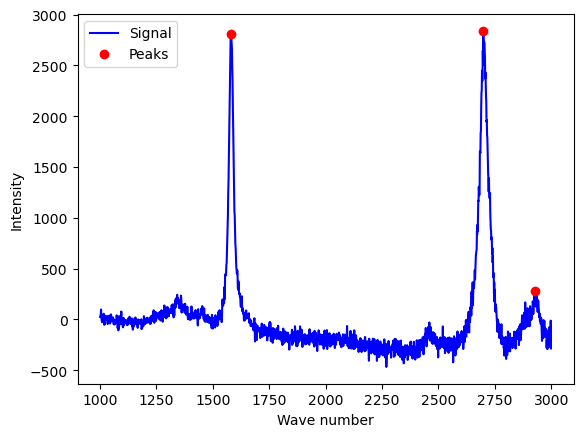

In [20]:
#Peak finding in detrended data

peaks, properties = signal.find_peaks(intensity_detrended,
                                      height=200, width=10, prominence=400)

# Plot
plt.plot(wave_number, intensity_detrended, 'b', label="Signal")
plt.plot(wave_number[peaks], intensity_detrended[peaks], 'ro', label="Peaks")
plt.xlabel("Wave number")
plt.ylabel("Intensity")
plt.legend()

# Print
print(f"Number of peaks: {len(peaks)}")

print("\nPeaks:")
for i, peak in enumerate(peaks):
    print(f"Center: {wave_number[peak]:.2f}",
          f"Height: {properties['peak_heights'][i]:.2f}",
          f"Width: {properties['widths'][i]:.2f}",
          sep="\t")

Number of peaks: 3

Peaks:
Center: 2936.42	Height: 219.89	Width: 47.30
Center: 2702.77	Height: 2695.50	Width: 42.98
Center: 1580.85	Height: 2819.54	Width: 17.43


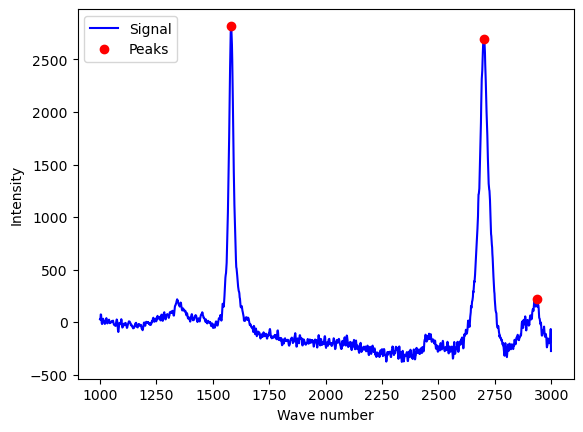

In [21]:
#Peak finding in smoothed data

peaks, properties = signal.find_peaks(intensity_smooth,
                                      height=200, width=10, prominence=400)

# Plot
plt.plot(wave_number, intensity_smooth, 'b', label="Signal")
plt.plot(wave_number[peaks], intensity_smooth[peaks], 'ro', label="Peaks")
plt.xlabel("Wave number")
plt.ylabel("Intensity")
plt.legend()

# Print
print(f"Number of peaks: {len(peaks)}")

print("\nPeaks:")
for i, peak in enumerate(peaks):
    print(f"Center: {wave_number[peak]:.2f}",
          f"Height: {properties['peak_heights'][i]:.2f}",
          f"Width: {properties['widths'][i]:.2f}",
          sep="\t")

### Question 4.6
*5 points*

Which of the two signals should be preferred for peak finding? Why?

**Answer:** The unsmoothed data should be preferred for peak finding because smoothing changes the heights of the peaks, leading to inaccurate results. However, for noisy signals the peak locations can be inaccurate because the noise might add a false local maxima. In such cases, the smoothed data would be preferred for peak finding.